# Question 1 – Programming (80 points):
In this programming problem, you will get familiar with building a neural network using
backpropagation. You will write a program that learns how to recognize the handwritten digits using
stochastic gradient descent and the MNIST training data.
The MNIST database (Modified National Institute of Standards and Technology database is a large
database of handwritten digits that is commonly used for training various image processing systems.

## Step 1 Data Acquisition and Visualization 

(a) Download the “MNIST” dataset and extract the files. You will get four files with extension .gz
(e.g., train-images-idx3-ubyte.gz). You can use the provided function read_idx below to read in the dataset. As its official description, the dataset is split into 60000 training images and 10000 images. The four file corresponds to the training images, training labels, testing images and testing labels. You need to print out their shape to finish this step. (5 pts)

### Importing required libraries for this solution

In [39]:
import numpy as np
import gzip
import struct
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, models


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [40]:


def read_idx(filename):
  with gzip.open(filename, 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)



The above logic code to extract file is given by the professor in the assignment

In [41]:
train_images = read_idx('Data/train-images-idx3-ubyte.gz')
train_labels = read_idx('Data/train-labels-idx1-ubyte.gz')
test_images = read_idx('Data/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('Data/t10k-labels-idx1-ubyte.gz')

# Print the shapes of the training and testing data
print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Testing images shape:', test_images.shape)
print('Testing labels shape:', test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


(b) To further understand what the dataset is, you need to use the ‘matplotlib’ library to print out a random data with code plt.imshow together with its label.(5 pts) You will see something like this: Some random Check for above data

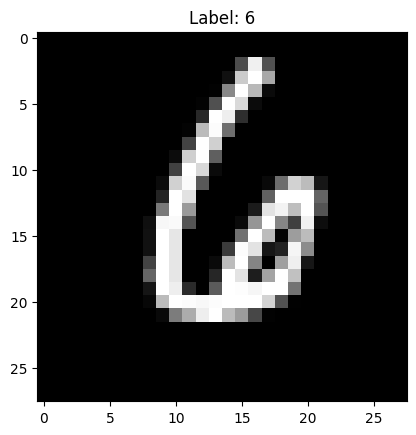

In [42]:
# Select a random index from the training set
index = random.randint(0, len(train_images) - 1)

# Display the image
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.show()


# Step 2 Data Preprocessing

a) Normalize the pixel values of images to be between 0 and 1

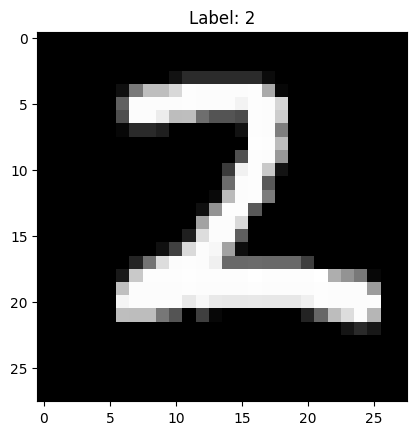

In [43]:
# Function to normalize pixel values
def normalize_images(images):
    return images / 255.0

# Normalize the training and testing images
train_images_normalized = normalize_images(train_images)
test_images_normalized = normalize_images(test_images)

# Select a random index from the training set
index = random.randint(0, len(train_images) - 1)

# Display the normalized image
plt.imshow(train_images_normalized[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.show()


##### b) Convert the labels from categorical data into numerical values using one-hot encoding. (5 pts) hint: you can explore the eye function in Numpy.

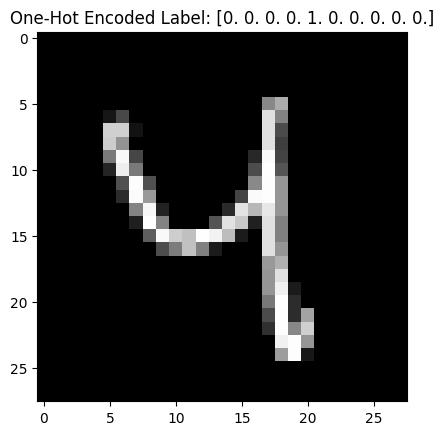

In [44]:
# Function to perform one-hot encoding
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

# Number of classes in the MNIST dataset (digits 0 through 9)
num_classes = 10

# One-hot encode the training and testing labels
train_labels_one_hot = one_hot_encode(train_labels, num_classes)
test_labels_one_hot = one_hot_encode(test_labels, num_classes)

# Select a random index from the training set
index = random.randint(0, len(train_images) - 1)

# Display the normalized image and its one-hot encoded label
plt.imshow(train_images_normalized[index], cmap='gray')
plt.title(f"One-Hot Encoded Label: {train_labels_one_hot[index]}")
plt.show()


### Step 3 Network Initialization (10 pts): We will work with a neuron network with two hidden layers, using Sigmoid function as the activation functions for hidden layers and softmax activation function for the output layer. 

#### (a) Identify the auxiliary input including the Sigmoid function and its derivative and Softmax function (5 pts)

In [45]:
# Assuming your input features have a size of 100 (replace it with the actual size)
input_size = 784
hidden1_units = 128
hidden2_units = 64
output_size = 10  # Replace it with the actual number of classes in your classification problem

# Define the neural network architecture
model = models.Sequential()

# Input layer (auxiliary input)
model.add(layers.InputLayer(input_shape=(input_size,)))

# First hidden layer with Sigmoid activation
model.add(layers.Dense(units=hidden1_units, activation='sigmoid'))

# Second hidden layer with Sigmoid activation
model.add(layers.Dense(units=hidden2_units, activation='sigmoid'))

# Output layer with Softmax activation for multi-class classification
model.add(layers.Dense(units=num_classes, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(b) Initialize all the parameters in neural network uniformly. In this network, the input size is 784
dimensions (each input is a 28x28 image, so you have to flatten the data from 2D to 1D). For the
two linear hidden layers, we have 128 and 64 neurons respectively. For the output layer, its size
will be 10 since there are 10 classes (0-9) in MNIST. To finish this step, you need to initialize the
weights and bias in random with a pre-set random seed using Numpy. Please set the seed value
= 695.

In [46]:
# Set the random seed
np.random.seed(695)

# Network architecture parameters
input_size = 784
hidden1_units = 128
hidden2_units = 64
num_classes = 10


In [47]:

# Function to initialize weights and biases uniformly
def initialize_parameters_uniform(input_size, hidden1_units, hidden2_units, num_classes):
    # Initialize weights and biases for the first hidden layer
    W1 = np.random.uniform(size=(input_size, hidden1_units), low=-0.05, high=0.05)
    b1 = np.zeros((1, hidden1_units))
    
    # Initialize weights and biases for the second hidden layer
    W2 = np.random.uniform(size=(hidden1_units, hidden2_units), low=-0.05, high=0.05)
    b2 = np.zeros((1, hidden2_units))
    
    # Initialize weights and biases for the output layer
    W_out = np.random.uniform(size=(hidden2_units, num_classes), low=-0.05, high=0.05)
    b_out = np.zeros((1, num_classes))
    
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W_out': W_out, 'b_out': b_out}



In [48]:

# Initialize parameters
parameters = initialize_parameters_uniform(input_size, hidden1_units, hidden2_units, num_classes)

# Print the initialized parameters
for param_name, param_value in parameters.items():
    print(f"{param_name} shape: {param_value.shape}")

# Define the neural network architecture using TensorFlow
model = models.Sequential()

# Input layer (auxiliary input)
model.add(layers.InputLayer(input_shape=(input_size,)))

# First hidden layer with Sigmoid activation
model.add(layers.Dense(units=hidden1_units, activation='sigmoid', 
                       kernel_initializer=tf.constant_initializer(parameters['W1']),
                       bias_initializer=tf.constant_initializer(parameters['b1'])))

# Second hidden layer with Sigmoid activation
model.add(layers.Dense(units=hidden2_units, activation='sigmoid',
                       kernel_initializer=tf.constant_initializer(parameters['W2']),
                       bias_initializer=tf.constant_initializer(parameters['b2'])))

# Output layer with Softmax activation for multi-class classification
model.add(layers.Dense(units=num_classes, activation='softmax',
                       kernel_initializer=tf.constant_initializer(parameters['W_out']),
                       bias_initializer=tf.constant_initializer(parameters['b_out'])))

# Print model summary
model.summary()

W1 shape: (784, 128)
b1 shape: (1, 128)
W2 shape: (128, 64)
b2 shape: (1, 64)
W_out shape: (64, 10)
b_out shape: (1, 10)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 4 Feed Forward (10 pts): In this step, you need to:
(a) Define a function named feed_forward. Given an input x, it should output the sigmoid of wx+b
where w and b indicates the weights and bias defined in step 2.

In [49]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def feed_forward(x, parameters):
    """
    Compute the sigmoid of wx + b for the given input x and parameters.

    Parameters:
    - x: Input data
    - parameters: Dictionary containing weights and biases (W1, b1, W2, b2, W_out, b_out)

    Returns:
    - Output of the feedforward computation (sigmoid(wx + b))
    """
    # Extract parameters
    W1, b1, W2, b2, W_out, b_out = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], parameters['W_out'], parameters['b_out']

    # First hidden layer computation
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # Second hidden layer computation
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer computation
    z_out = np.dot(a2, W_out) + b_out
    a_out = sigmoid(z_out)

    return a_out



In [50]:
# Test the feed_forward function with a random input
random_input = np.random.rand(784)  # Assuming input size is 784
output = feed_forward(random_input, parameters)
print("Output of the feedforward computation:", output)


Output of the feedforward computation: [[0.51583739 0.50351818 0.50000021 0.51680552 0.47134494 0.52055435
  0.51457661 0.50709139 0.5371896  0.51033925]]


## Step 5 Back Propagation (15 pts): In this step, you need to implement the back propagation:
(a) You need to compute the loss for the output layer first. Here, we use categorical cross entropy
loss function given below for multi-class classification problem. (5 pts) Note, to achieve this, you
need to first encode the categorical labels as numerical values using one-hot encoding finished
in step 2. (5 pts)

In [51]:
def categorical_cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]

    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)

    return -np.sum(y_true * np.log(y_pred_clipped)) / n_samples


In [52]:
train_labels_one_hot = one_hot_encode(train_labels, num_classes)
output = feed_forward(train_images_normalized.reshape(-1, 784), parameters)

# Compute categorical cross-entropy loss
loss = categorical_cross_entropy_loss(train_labels_one_hot, output)

print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: 0.6749163116973229


(b) Calculate the gradients for the weights and bias for each layer. Use the chain rule to compute
gradients for previous layers

In [53]:
def sigmoid_derivative(x):
    return x * (1 - x)

def compute_gradients(x, y_true, parameters):
    # Forward pass
    z1 = np.dot(x, parameters['W1']) + parameters['b1']
    a1 = sigmoid(z1)

    z2 = np.dot(a1, parameters['W2']) + parameters['b2']
    a2 = sigmoid(z2)

    z_out = np.dot(a2, parameters['W_out']) + parameters['b_out']
    a_out = sigmoid(z_out)

    # Compute loss
    loss = categorical_cross_entropy_loss(y_true, a_out)

    # Backward pass (chain rule)
    dz_out = a_out - y_true
    dW_out = np.dot(a2.T, dz_out)
    db_out = np.sum(dz_out, axis=0, keepdims=True)

    dz2 = np.dot(dz_out, parameters['W_out'].T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, parameters['W2'].T) * sigmoid_derivative(a1)
    dW1 = np.dot(x.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW_out': dW_out, 'db_out': db_out}

    return gradients, loss

In [54]:
gradients, loss = compute_gradients(train_images_normalized.reshape(-1, 784), train_labels_one_hot, parameters)

# Access gradients for each layer
dW1 = gradients['dW1']
db1 = gradients['db1']
dW2 = gradients['dW2']
db2 = gradients['db2']
dW_out = gradients['dW_out']
db_out = gradients['db_out']

print("Gradient for W1:", dW1)
print("Gradient for b1:", db1)
print("Gradient for W2:", dW2)
print("Gradient for b2:", db2)
print("Gradient for W_out:", dW_out)
print("Gradient for b_out:", db_out)
print("Loss:", loss)

Gradient for W1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Gradient for b1: [[  37.15890764   10.49527441   35.42762447    1.48869993   57.63955928
    23.71714637   28.62471375    5.23208098  -39.37393375   -7.58656536
   -11.89693843 -100.75579932   21.4730848    23.31180087  -22.68679191
    -3.38703005  -22.07828098   13.08260521   -9.63690433  -66.47048752
     6.6275018   -16.7504176    -7.82433839  -13.15156844   41.93555694
    51.65497589  -10.65350552  -25.64348959   59.76043527   39.53332327
    20.01654132  -31.25424617  -12.38457174  -21.53994215    9.46716744
    39.92751898   44.24890059  -36.23871119  -48.28794261   44.97893449
    29.87515614   20.34137017  -13.01470591   25.95962937   13.68014627
   -14.61930137    9.63591864  -35.72039694  -93.6860092   -17.39148991
     4.92941551    6.35104276   14.70829925  -30.58981665   16.81208597
   -42.89552473   

### Step 6 Model Training (15 pts): In this step, you need to:
(a) Use mini-batch gradient descent to update the parameters including weights and bias. Notice
that a complete training round consists of a feed forward process, back propagation and
parameter update. Define the batch size = 128 and epoch = 100

In [55]:
def mini_batch_gradient_descent(train_data, train_labels, parameters, batch_size, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(0, len(train_data), batch_size):
            # Extract mini-batch
            x_batch = train_data[i:i+batch_size]
            y_batch = train_labels[i:i+batch_size]

            # Forward and backward pass
            gradients, loss = compute_gradients(x_batch, y_batch, parameters)

            # Update parameters using gradients and learning rate
            for param_name in parameters:
                parameters[param_name] -= learning_rate * gradients[f'd{param_name}']

        # Print loss for each epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    return parameters



In [56]:
batch_size = 128
learning_rate = 0.01
epochs = 100

parameters = mini_batch_gradient_descent(train_images_normalized.reshape(-1, 784), train_labels_one_hot, parameters, batch_size, learning_rate, epochs)


Epoch 1/100, Loss: 0.5360736702658678
Epoch 2/100, Loss: 0.2899016935069095
Epoch 3/100, Loss: 0.23184752290416089
Epoch 4/100, Loss: 0.21971226340615682
Epoch 5/100, Loss: 0.2130834564126229
Epoch 6/100, Loss: 0.20548213258096995
Epoch 7/100, Loss: 0.19472640013908507
Epoch 8/100, Loss: 0.18579801503926716
Epoch 9/100, Loss: 0.1796659418434521
Epoch 10/100, Loss: 0.17558093546785977
Epoch 11/100, Loss: 0.1708589822860992
Epoch 12/100, Loss: 0.16594475201474493
Epoch 13/100, Loss: 0.16261616258155007
Epoch 14/100, Loss: 0.16079460445993618
Epoch 15/100, Loss: 0.15973726963973714
Epoch 16/100, Loss: 0.15890574823527212
Epoch 17/100, Loss: 0.15753783301375104
Epoch 18/100, Loss: 0.15544449794553608
Epoch 19/100, Loss: 0.15309179773362458
Epoch 20/100, Loss: 0.1507284561612342
Epoch 21/100, Loss: 0.14825785872610195
Epoch 22/100, Loss: 0.14546788079580733
Epoch 23/100, Loss: 0.14213334798644264
Epoch 24/100, Loss: 0.13807304017518426
Epoch 25/100, Loss: 0.1332575279088989
Epoch 26/100, Lo

In [57]:
def predict(x, parameters):
    # Forward pass
    z1 = np.dot(x, parameters['W1']) + parameters['b1']
    a1 = sigmoid(z1)

    z2 = np.dot(a1, parameters['W2']) + parameters['b2']
    a2 = sigmoid(z2)

    z_out = np.dot(a2, parameters['W_out']) + parameters['b_out']
    a_out = sigmoid(z_out)

    # Convert probabilities to class labels
    predictions = np.argmax(a_out, axis=1)

    return predictions

def accuracy(y_true, y_pred):
    # Compare predicted labels with true labels
    correct_predictions = np.sum(y_true == y_pred)

    # Compute accuracy
    acc = correct_predictions / len(y_true)
    return acc



In [58]:
test_predictions = predict(test_images_normalized.reshape(-1, 784), parameters)
# Convert one-hot encoded labels back to numerical labels for accuracy calculation
test_labels_numerical = np.argmax(test_labels_one_hot, axis=1)

test_accuracy = accuracy(test_labels_numerical, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test Accuracy in percentage:", test_accuracy*100,'%')

Test Accuracy: 0.9809
Test Accuracy in percentage: 98.09 %


In [59]:

def plot_misclassified_images(images, true_labels, predicted_labels, num_images=5):
    misclassified_indices = np.where(true_labels != predicted_labels)[0]

    # Randomly select a subset of misclassified images
    selected_indices = np.random.choice(misclassified_indices, size=num_images, replace=False)

    # Plot the selected misclassified images
    plt.figure(figsize=(12, 8))
    for i, index in enumerate(selected_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[index]}, Predicted: {predicted_labels[index]}')
        plt.axis('off')

    plt.show()

# Assuming 'test_images_normalized' is the normalized test data
# 'test_labels_numerical' is the numerical labels for test data
# 'test_predictions' is the predicted labels on the test data


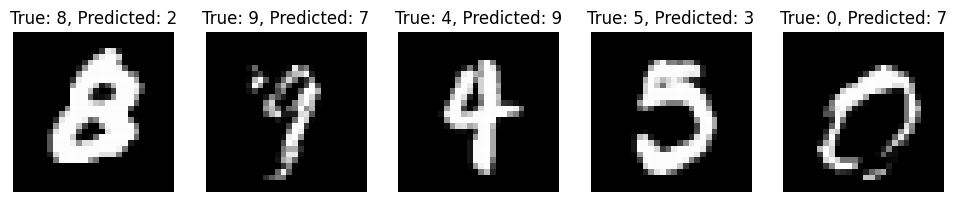

In [60]:
plot_misclassified_images(test_images_normalized, test_labels_numerical, test_predictions, num_images=5)


### Other matrices

In [61]:

precision = precision_score(test_labels_numerical, test_predictions, average='weighted')
recall = recall_score(test_labels_numerical, test_predictions, average='weighted')
f1 = f1_score(test_labels_numerical, test_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute and plot confusion matrix

Precision: 0.9809121525715345
Recall: 0.9809
F1-Score: 0.9808949400590045
